### 0. Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing - Split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Metrics for Regression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

# Metrics for Classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### 1. Data Ingestion

In [2]:
sw_df = pd.read_csv('./solar_wind.csv')

In [3]:
dst_df = pd.read_csv('./dst_labelled.csv')

In [4]:
sw_df.describe(include='all')

,period,timedelta,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
count,3551040,3551040,3.462764e+06,3.462764e+06,3.462764e+06,3.462764e+06,3.462764e+06,3.462764e+06,3.462764e+06,3.462764e+06,3.462764e+06,3.462764e+06,3.462764e+06,3.286306e+06,3.280229e+06,3.243663e+06,3472775
unique,3,1533600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,test_a,0 days 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ac
freq,1533600,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3095582
mean,NaN,NaN,-5.866129e-01,-2.033798e-01,2.470524e-02,4.554864e-01,2.019043e+02,-5.871871e-01,-2.063047e-01,4.341797e-03,6.927215e-02,2.016677e+02,6.041756e+00,3.945167e+00,4.342067e+02,1.105305e+05,NaN
std,NaN,NaN,4.022425e+00,4.201967e+00,3.704496e+00,3.342904e+01,9.770979e+01,4.020192e+00,4.138919e+00,3.777018e+00,3.449593e+01,9.800404e+01,3.385754e+00,4.213429e+00,1.065576e+02,1.108305e+05,NaN
min,NaN,NaN,-4.348000e+01,-6.938000e+01,-7.371000e+01,-8.990000e+01,0.000000e+00,-4.350000e+01,-7.434000e+01,-6.903000e+01,-8.992000e+01,0.000000e+00,5.000000e-02,0.000000e+00,2.248800e+02,2.000000e+03,NaN
25%,NaN,NaN,-3.330000e+00,-2.870000e+00,-1.960000e+00,-2.280000e+01,1.296500e+02,-3.320000e+00,-2.780000e+00,-2.060000e+00,-2.444000e+01,1.299700e+02,3.870000e+00,1.530000e+00,3.563800e+02,3.961400e+04,NaN
50%,NaN,NaN,-3.600000e-01,-3.300000e-01,1.000000e-02,1.700000e-01,1.910100e+02,-3.600000e-01,-3.100000e-01,-2.000000e-02,-2.700000e-01,1.905800e+02,5.310000e+00,2.960000e+00,4.123400e+02,7.663600e+04,NaN
75%,NaN,NaN,2.330000e+00,2.440000e+00,1.950000e+00,2.348000e+01,2.940000e+02,2.330000e+00,2.360000e+00,2.040000e+00,2.441000e+01,2.942500e+02,7.330000e+00,5.130000e+00,4.865500e+02,1.432420e+05,NaN


In [5]:
sw_df.head()

,period,timedelta,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
0,test_a,0 days 00:00:00,-3.35,3.44,-1.01,-11.91,134.18,-3.35,3.59,0.14,1.65,133.00,4.91,5.57,338.59,41313.0,ac
1,test_a,0 days 00:01:00,-2.98,3.59,-1.04,-12.52,129.71,-2.98,3.73,0.17,1.98,128.61,4.78,5.66,339.11,37388.0,ac
2,test_a,0 days 00:02:00,-3.29,3.46,-1.04,-12.33,133.54,-3.29,3.62,0.12,1.34,132.29,4.89,4.95,337.70,35715.0,ac
3,test_a,0 days 00:03:00,-3.39,3.44,-0.79,-9.29,134.57,-3.39,3.51,0.35,4.09,133.97,4.89,4.96,338.41,38214.0,ac
4,test_a,0 days 00:04:00,-3.28,3.52,-0.86,-10.13,132.99,-3.28,3.61,0.31,3.59,132.26,4.88,5.35,336.63,40458.0,ac


In [6]:
sw_df_cleaned = sw_df.dropna()

In [7]:
sw_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3226819 entries, 0 to 3551039
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   period       object 
 1   timedelta    object 
 2   bx_gse       float64
 3   by_gse       float64
 4   bz_gse       float64
 5   theta_gse    float64
 6   phi_gse      float64
 7   bx_gsm       float64
 8   by_gsm       float64
 9   bz_gsm       float64
 10  theta_gsm    float64
 11  phi_gsm      float64
 12  bt           float64
 13  density      float64
 14  speed        float64
 15  temperature  float64
 16  source       object 
dtypes: float64(14), object(3)
memory usage: 443.1+ MB


In [8]:
sw_df_cleaned.describe()

,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature
count,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06
mean,-5.945127e-01,-1.958490e-01,1.861039e-02,4.272927e-01,2.017080e+02,-5.950649e-01,-1.995586e-01,-8.447328e-05,4.357816e-02,2.014704e+02,6.035400e+00,3.981973e+00,4.357415e+02,1.105137e+05
std,4.029064e+00,4.187383e+00,3.683953e+00,3.334405e+01,9.767965e+01,4.026865e+00,4.120273e+00,3.760979e+00,3.441857e+01,9.796991e+01,3.365539e+00,4.202476e+00,1.063843e+02,1.106804e+05
min,-4.348000e+01,-6.938000e+01,-7.371000e+01,-8.990000e+01,0.000000e+00,-4.350000e+01,-7.434000e+01,-6.903000e+01,-8.991000e+01,0.000000e+00,5.000000e-02,0.000000e+00,2.288500e+02,2.000000e+03
25%,-3.340000e+00,-2.860000e+00,-1.950000e+00,-2.276000e+01,1.296000e+02,-3.340000e+00,-2.770000e+00,-2.050000e+00,-2.440000e+01,1.299400e+02,3.870000e+00,1.570000e+00,3.578900e+02,3.961500e+04
50%,-3.800000e-01,-3.200000e-01,1.000000e-02,1.800000e-01,1.903900e+02,-3.800000e-01,-3.000000e-01,-2.000000e-02,-2.800000e-01,1.899200e+02,5.310000e+00,3.000000e+00,4.137000e+02,7.663000e+04
75%,2.330000e+00,2.450000e+00,1.950000e+00,2.337000e+01,2.939500e+02,2.330000e+00,2.370000e+00,2.030000e+00,2.429000e+01,2.941800e+02,7.330000e+00,5.170000e+00,4.880800e+02,1.433000e+05
max,3.542000e+01,5.242000e+01,6.793000e+01,8.986000e+01,3.600000e+02,3.541000e+01,5.839000e+01,6.195000e+01,8.990000e+01,3.600000e+02,8.138000e+01,1.927100e+02,1.374500e+03,6.158688e+06


In [9]:
sw_df_cleaned.drop(['bx_gsm', 'by_gsm', 'bz_gsm', 'theta_gsm', 'phi_gsm'], axis=1, inplace=True)

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
sw_df_cleaned.head()

,period,timedelta,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bt,density,speed,temperature,source
0,test_a,0 days 00:00:00,-3.35,3.44,-1.01,-11.91,134.18,4.91,5.57,338.59,41313.0,ac
1,test_a,0 days 00:01:00,-2.98,3.59,-1.04,-12.52,129.71,4.78,5.66,339.11,37388.0,ac
2,test_a,0 days 00:02:00,-3.29,3.46,-1.04,-12.33,133.54,4.89,4.95,337.70,35715.0,ac
3,test_a,0 days 00:03:00,-3.39,3.44,-0.79,-9.29,134.57,4.89,4.96,338.41,38214.0,ac
4,test_a,0 days 00:04:00,-3.28,3.52,-0.86,-10.13,132.99,4.88,5.35,336.63,40458.0,ac


In [11]:
sw_df_cleaned.drop(["period", "source"], axis=1, inplace=True)

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
sw_df_cleaned.describe()

,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bt,density,speed,temperature
count,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06,3.226819e+06
mean,-5.945127e-01,-1.958490e-01,1.861039e-02,4.272927e-01,2.017080e+02,6.035400e+00,3.981973e+00,4.357415e+02,1.105137e+05
std,4.029064e+00,4.187383e+00,3.683953e+00,3.334405e+01,9.767965e+01,3.365539e+00,4.202476e+00,1.063843e+02,1.106804e+05
min,-4.348000e+01,-6.938000e+01,-7.371000e+01,-8.990000e+01,0.000000e+00,5.000000e-02,0.000000e+00,2.288500e+02,2.000000e+03
25%,-3.340000e+00,-2.860000e+00,-1.950000e+00,-2.276000e+01,1.296000e+02,3.870000e+00,1.570000e+00,3.578900e+02,3.961500e+04
50%,-3.800000e-01,-3.200000e-01,1.000000e-02,1.800000e-01,1.903900e+02,5.310000e+00,3.000000e+00,4.137000e+02,7.663000e+04
75%,2.330000e+00,2.450000e+00,1.950000e+00,2.337000e+01,2.939500e+02,7.330000e+00,5.170000e+00,4.880800e+02,1.433000e+05
max,3.542000e+01,5.242000e+01,6.793000e+01,8.986000e+01,3.600000e+02,8.138000e+01,1.927100e+02,1.374500e+03,6.158688e+06


In [13]:
for column in sw_df_cleaned.columns:
    plt.figure()
    sns.violinplot(x=column, data=sw_df_cleaned)

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 432x288 with 0 Axes>

In [14]:
dst_df.describe()

,Unnamed: 0,dst
count,59184.000000,59184.000000
mean,29591.500000,-13.811469
std,17085.093503,22.016022
min,0.000000,-422.000000
25%,14795.750000,-22.000000
50%,29591.500000,-9.000000
75%,44387.250000,-1.000000
max,59183.000000,77.000000


In [15]:
dst_df.head()

,Unnamed: 0,period,timedelta,dst,labels
0,0,test_a,0 days 00:00:00,16,low
1,1,test_a,0 days 01:00:00,15,low
2,2,test_a,0 days 02:00:00,15,low
3,3,test_a,0 days 03:00:00,14,low
4,4,test_a,0 days 04:00:00,14,low


In [16]:
dst_df_cleaned = dst_df.drop(["Unnamed: 0", "period"], axis=1)

In [17]:
dst_df_cleaned.head()

,timedelta,dst,labels
0,0 days 00:00:00,16,low
1,0 days 01:00:00,15,low
2,0 days 02:00:00,15,low
3,0 days 03:00:00,14,low
4,0 days 04:00:00,14,low


In [19]:
pred_pd = pd.merge(sw_df_cleaned, dst_df_cleaned)

In [20]:
pred_pd.describe()

,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bt,density,speed,temperature,dst
count,136599.000000,136599.000000,136599.000000,136599.000000,136599.000000,136599.000000,136599.000000,136599.000000,1.365990e+05,136599.000000
mean,-0.650529,-0.189442,0.015515,0.401064,201.201254,5.920998,4.059917,427.832113,1.057349e+05,-13.316188
std,3.955925,4.128766,3.614896,33.263981,97.222274,3.345126,4.198427,101.174005,1.087027e+05,21.447215
min,-39.810000,-51.780000,-65.700000,-89.840000,0.000000,0.200000,0.000000,233.980000,4.025000e+03,-422.000000
25%,-3.300000,-2.810000,-1.910000,-22.780000,129.460000,3.780000,1.590000,354.150000,3.801600e+04,-21.000000
50%,-0.430000,-0.300000,0.020000,0.220000,189.990000,5.170000,3.090000,407.200000,7.229600e+04,-9.000000
75%,2.220000,2.410000,1.900000,23.000000,292.745000,7.180000,5.300000,476.280000,1.348530e+05,-1.000000
max,25.240000,40.900000,52.670000,89.530000,360.000000,81.130000,144.090000,1374.500000,3.226865e+06,77.000000


In [23]:
pred_pd.drop(["timedelta"], axis=1, inplace=True)

In [24]:
pred_pd.describe()

,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bt,density,speed,temperature,dst
count,136599.000000,136599.000000,136599.000000,136599.000000,136599.000000,136599.000000,136599.000000,136599.000000,1.365990e+05,136599.000000
mean,-0.650529,-0.189442,0.015515,0.401064,201.201254,5.920998,4.059917,427.832113,1.057349e+05,-13.316188
std,3.955925,4.128766,3.614896,33.263981,97.222274,3.345126,4.198427,101.174005,1.087027e+05,21.447215
min,-39.810000,-51.780000,-65.700000,-89.840000,0.000000,0.200000,0.000000,233.980000,4.025000e+03,-422.000000
25%,-3.300000,-2.810000,-1.910000,-22.780000,129.460000,3.780000,1.590000,354.150000,3.801600e+04,-21.000000
50%,-0.430000,-0.300000,0.020000,0.220000,189.990000,5.170000,3.090000,407.200000,7.229600e+04,-9.000000
75%,2.220000,2.410000,1.900000,23.000000,292.745000,7.180000,5.300000,476.280000,1.348530e+05,-1.000000
max,25.240000,40.900000,52.670000,89.530000,360.000000,81.130000,144.090000,1374.500000,3.226865e+06,77.000000


In [25]:
corr = pred_pd.corr()

<AxesSubplot:>

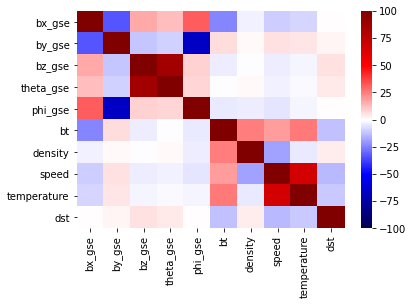

In [26]:
sns.heatmap(corr*100, vmin=-100, cmap='seismic')

### Split features and target

In [27]:
X = pred_pd.drop(["dst", "labels"], axis=1)
y = pred_pd.dst

In [28]:
X

,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bt,density,speed,temperature
0,-3.35,3.44,-1.01,-11.91,134.18,4.91,5.57,338.59,41313.0
1,-3.35,3.44,-1.01,-11.91,134.18,4.91,5.57,338.59,41313.0
2,-3.35,3.44,-1.01,-11.91,134.18,4.91,5.57,338.59,41313.0
3,-2.02,2.14,-3.60,-50.70,133.38,4.65,3.49,342.67,29860.0
4,-2.02,2.14,-3.60,-50.70,133.38,4.65,3.49,342.67,29860.0
...,...,...,...,...,...,...,...,...,...
136594,-0.53,4.35,1.41,17.79,97.00,4.62,8.79,470.60,152192.0
136595,-0.53,4.35,1.41,17.79,97.00,4.62,8.79,470.60,152192.0
136596,-0.27,4.39,-2.09,-25.45,93.47,4.87,7.80,466.80,185274.0
136597,-0.27,4.39,-2.09,-25.45,93.47,4.87,7.80,466.80,185274.0


In [29]:
y

0         16
1        -11
2         -5
3         16
4        -11
          ..
136594    16
136595   -26
136596   -43
136597    14
136598   -29
Name: dst, Length: 136599, dtype: int64

### Scale the data

In [30]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [32]:
X_scaled

array([[-0.68238925,  0.87906535, -0.28369255, ...,  0.3596796 ,
        -0.88206886, -0.59264477],
       [-0.68238925,  0.87906535, -0.28369255, ...,  0.3596796 ,
        -0.88206886, -0.59264477],
       [-0.68238925,  0.87906535, -0.28369255, ...,  0.3596796 ,
        -0.88206886, -0.59264477],
       ...,
       [ 0.09619262,  1.10915913, -0.58245742, ...,  0.89083284,
         0.38515852,  0.73171521],
       [ 0.09619262,  1.10915913, -0.58245742, ...,  0.89083284,
         0.38515852,  0.73171521],
       [ 0.09619262,  1.10915913, -0.58245742, ...,  0.89083284,
         0.38515852,  0.73171521]])

### Train-test split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

In [42]:
np.shape(X_train), np.shape(y_train)

((95619, 9), (95619,))

### Train the ML algorithm

In [35]:
from sklearn.neural_network import MLPRegressor

In [43]:
mlp_model = MLPRegressor(hidden_layer_sizes=[128,64,32,16], activation='tanh', alpha=0.001, random_state = 123)
mlp_model.fit(X_train, y_train)


/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', alpha=0.001,
             hidden_layer_sizes=[128, 64, 32, 16], random_state=123)

In [44]:
y_pred_mlp = mlp_model.predict(X_test)

In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
enet_model = ElasticNet(alpha=0.5, l1_ratio=1, random_state=123)
enet_model.fit(X_train, y_train)

y_pred_enet = enet_model.predict(X_test)

### Model Evaluation

(-400.0, 150.0)

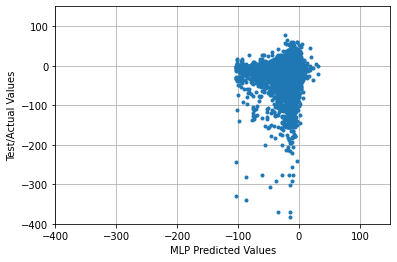

In [51]:
plt.figure()
plt.plot(y_pred_mlp, y_test, '.')
plt.grid()
plt.ylabel('Test/Actual Values')
plt.xlabel('MLP Predicted Values')

plt.ylim([-400,150])
plt.xlim([-400,150])

(-400.0, 150.0)

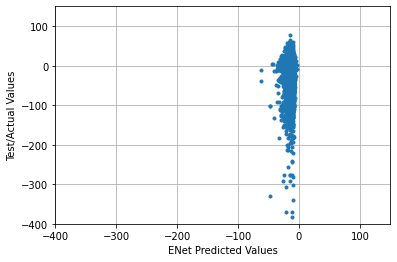

In [52]:
plt.figure()
plt.plot(y_pred_enet, y_test, '.')
plt.grid()
plt.ylabel('Test/Actual Values')
plt.xlabel('ENet Predicted Values')

plt.ylim([-400,150])
plt.xlim([-400,150])

In [54]:
print('MSE for MLP:', mse(y_test,y_pred_mlp))
print('MSE for ENet:', mse(y_test,y_pred_enet))

MSE for MLP: 477.25729654347373
MSE for ENet: 439.2181847513459


In [55]:
print('MAE for MLP:', mae(y_test,y_pred_mlp))
print('MAE for ENet:', mae(y_test,y_pred_enet))

MAE for MLP: 14.377406334958641
MAE for ENet: 14.046343654543257
